In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys
import math
import warnings

Load the data from the csv file

In [80]:
data_a = pd.read_csv("data_a.csv")
name_zipcode = pd.read_csv("code-postaux.csv")
#put the name of the corresponding zipcode into the data_a dataphrame

data_a = pd.merge(data_a, name_zipcode, on='zipcode', how='left')
print(data_a.info())
print(data_a.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224156 entries, 0 to 224155
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        224156 non-null  int64  
 1   To rent                           212351 non-null  object 
 2   To sell                           212351 non-null  object 
 3   Price                             212351 non-null  float64
 4   Number of rooms                   210342 non-null  float64
 5   Living Area                       174805 non-null  float64
 6   Fully equipped kitchen            134413 non-null  object 
 7   Furnished                         145109 non-null  object 
 8   Open fire                         224156 non-null  bool   
 9   Terrace                           224156 non-null  bool   
 10  Area of the terrace               174733 non-null  float64
 11  Garden                            224156 non-null  b

In [48]:
#variable where to_rent collumn is True with pandas
data_a_to_rent = data_a[data_a["To rent"] == True]
#variable where to_rent collumn is False with pandas
data_a_to_buy = data_a[data_a["To rent"] == False]

#remove None values of the Price collumn
data_a_to_rent = data_a_to_rent[data_a_to_rent["Price"].notna()]
data_a_to_buy = data_a_to_buy[data_a_to_buy["Price"].notna()]

#Compute the median and std
median_rent = data_a_to_rent["Price"].median()
median_buy = data_a_to_buy["Price"].median()
std_rent = data_a_to_rent["Price"].std()
std_buy = data_a_to_buy["Price"].std()

#print the values
print("Median rent: ", median_rent)
print("Median buy: ", median_buy)
print("Std rent: ", std_rent)
print("Std buy: ", std_buy)

#remove outliers
data_a_to_buy = data_a_to_buy[data_a_to_buy["Price"] < 50_000_000]
data_a_to_rent = data_a_to_rent[data_a_to_rent["Price"] < 10_000]

#remove outliers
data_a_to_buy = data_a_to_buy[data_a_to_buy["Price"] > 50_000]
data_a_to_rent = data_a_to_rent[data_a_to_rent["Price"] > 100]





Median rent:  850.0
Median buy:  295000.0
Std rent:  7791.3559407149305
Std buy:  186989.91041028796


Do some boxplot of the prices and histogram

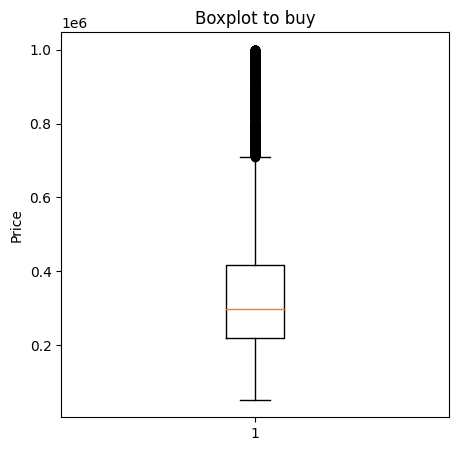

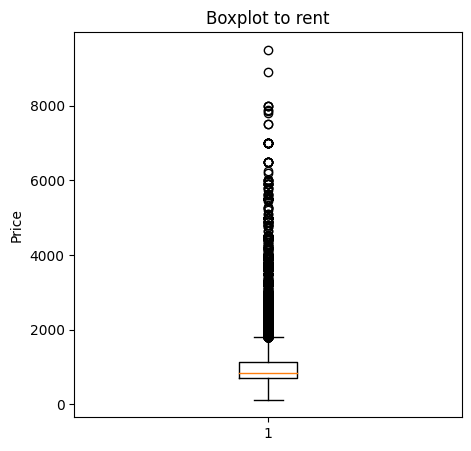

In [49]:
#plotting
plt.figure(figsize=(5, 5))
plt.title("Boxplot to buy")
plt.ylabel("Price")
plt.boxplot(data_a_to_buy["Price"])
plt.show()

#plotting
plt.figure(figsize=(5, 5))
plt.title("Boxplot to rent")
plt.ylabel("Price")
plt.boxplot(data_a_to_rent["Price"])
plt.show()

[Text(0.5, 1.0, 'Histogram of price to rent'),
 Text(0.5, 0, 'log Price'),
 Text(0, 0.5, 'Density')]

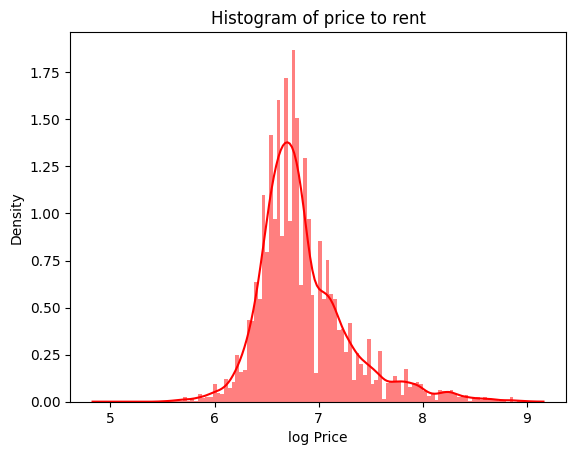

In [50]:
sns.histplot(np.log(data_a_to_rent["Price"]), color="red", label="100% Equities", kde=True, stat="density", linewidth=0).set(title='Histogram of price to rent', xlabel='log Price', ylabel='Density')

[Text(0.5, 1.0, 'Histogram of price to buy'),
 Text(0.5, 0, 'Log Price'),
 Text(0, 0.5, 'Density')]

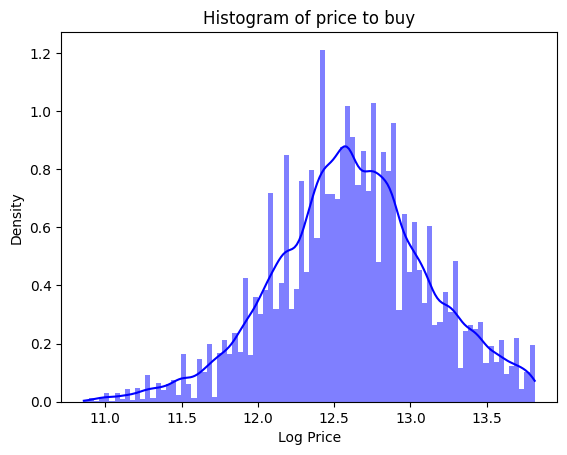

In [51]:
sns.histplot(np.log(data_a_to_buy["Price"]), color="blue", label="100% Equities", kde=True, stat="density", linewidth=0).set(title='Histogram of price to buy', xlabel='Log Price', ylabel='Density')

Separate the data by postcode

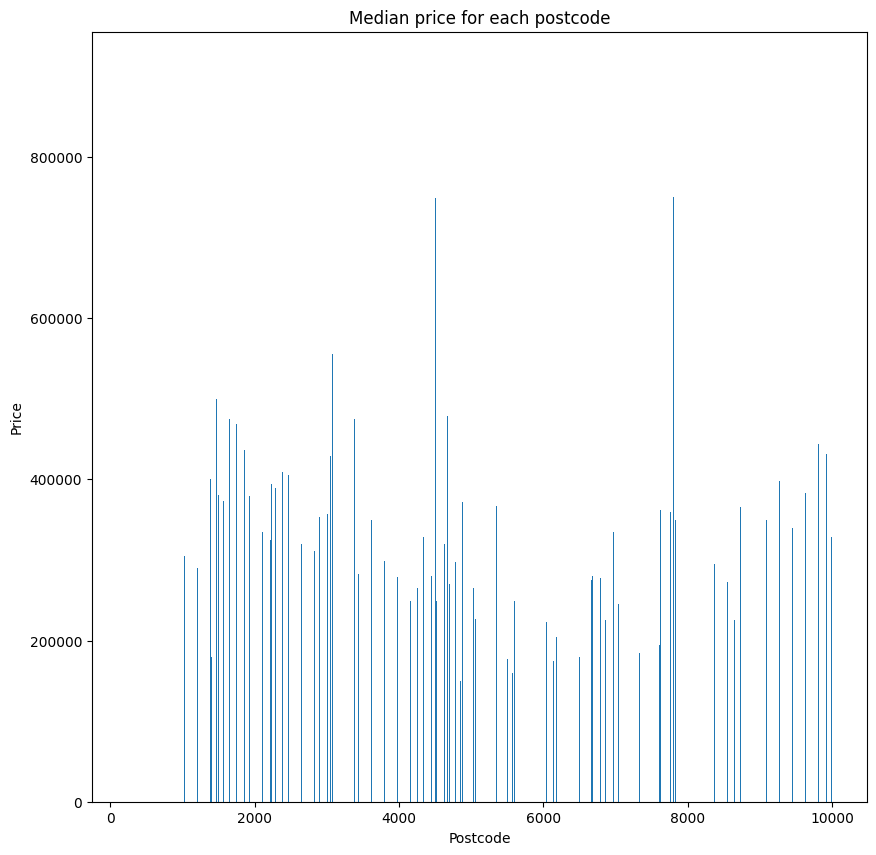

In [52]:
#get the list of postcode
postcode_list = data_a["zipcode"].unique()
#remove None values
postcode_list = postcode_list[postcode_list != None]

#compute the median of the price for each postcode
median_price_list = []
for postcode in postcode_list:
    median_price_list.append(data_a_to_buy[data_a_to_buy["zipcode"] == postcode]["Price"].median())

pzb = zip(postcode_list, median_price_list)
pzb = sorted(pzb, key=lambda x: x[1], reverse=True)
#remove nan
pzb = [x for x in pzb if str(x[1]) != 'nan']

#plot the median price for each postcode
plt.figure(figsize=(10, 10))
plt.title("Median price for each postcode")
plt.ylabel("Price")
plt.xlabel("Postcode")

plt.bar(postcode_list, median_price_list)
plt.show()


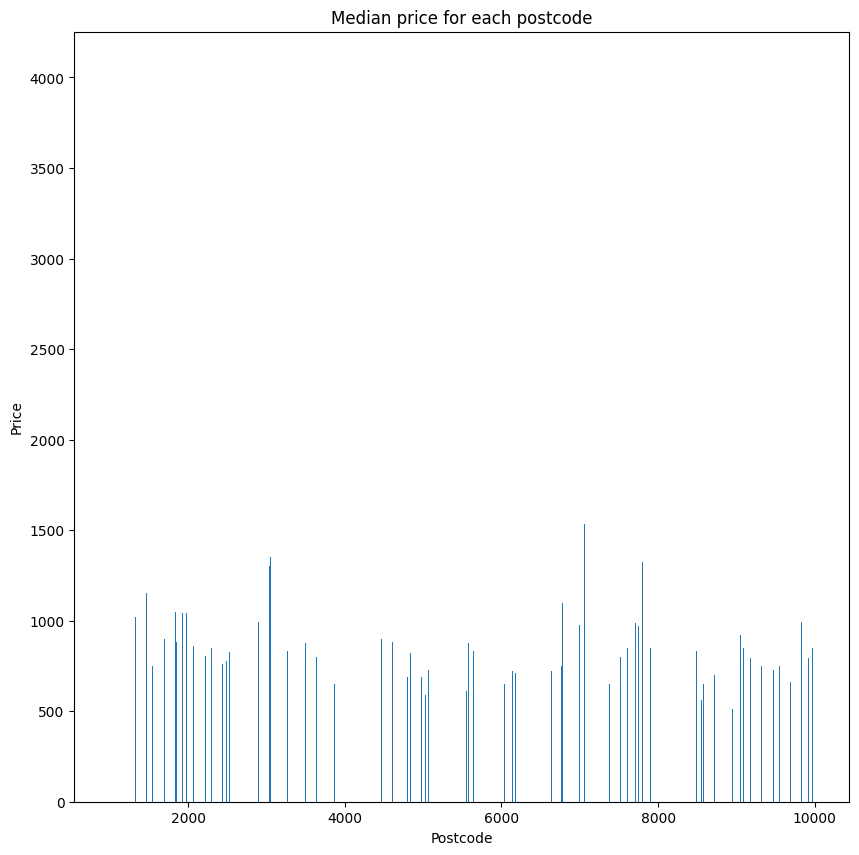

In [53]:
#get the list of postcode
postcode_list = data_a["zipcode"].unique()
#remove None values
postcode_list = postcode_list[postcode_list != None]

#compute the median of the price for each postcode
median_price_list = []
for postcode in postcode_list:
    median_price_list.append(data_a_to_rent[data_a_to_rent["zipcode"] == postcode]["Price"].median())

pzr = zip(postcode_list, median_price_list)
pzr = sorted(pzr, key=lambda x: x[1], reverse=True)
#remove nan
pzr = [x for x in pzr if str(x[1]) != 'nan']

#plot the median price for each postcode
plt.figure(figsize=(10, 10))
plt.title("Median price for each postcode")
plt.ylabel("Price")
plt.xlabel("Postcode")

plt.bar(postcode_list, median_price_list)
plt.show()

Make a bar chart with the 10 most expensive post code

[Text(0.5, 1.0, 'Top 10 most expensive postcode to buy'),
 Text(0.5, 0, 'Postcode'),
 Text(0, 0.5, 'Price')]

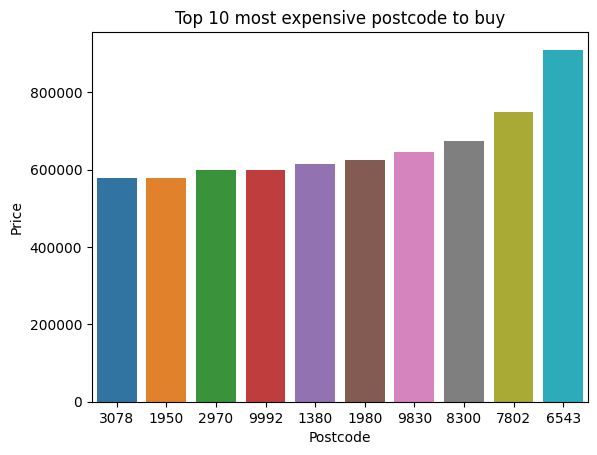

In [54]:
#find the 10 biggest value
pzr_e = pzr[:10]
pzb_e = pzb[:10]

#find the smallest biggest values
pzr_c = pzr[-10:]
pzb_c = pzb[-10:]

#dict as dataframe
df = pd.DataFrame(pzb_e, columns = ['Postcode', 'Price'])
#plot the bar chart by order of price with sns in decreasing price
sns.barplot(x="Postcode", y="Price", data=df, order = df.sort_values("Price").Postcode).set(title='Top 10 most expensive postcode to buy', xlabel='Postcode', ylabel='Price')

[Text(0.5, 1.0, 'Top 10 most expensive postcode to rent'),
 Text(0.5, 0, 'Postcode'),
 Text(0, 0.5, 'Price')]

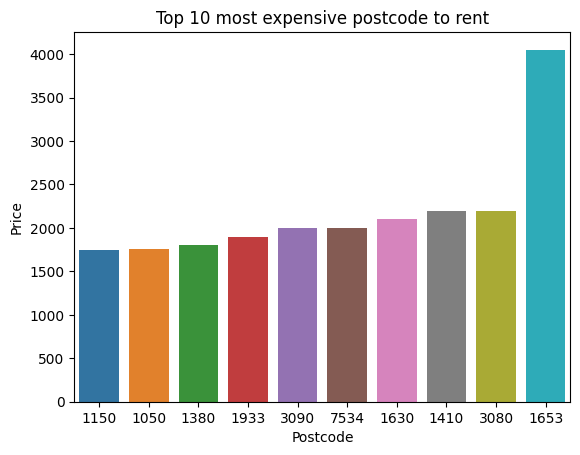

In [55]:
#dict as dataframe
df = pd.DataFrame(pzr_e, columns = ['Postcode', 'Price'])
#plot the bar chart by order of price with sns in decreasing price
sns.barplot(x="Postcode", y="Price", data=df, order = df.sort_values("Price").Postcode).set(title='Top 10 most expensive postcode to rent', xlabel='Postcode', ylabel='Price')

[Text(0.5, 1.0, 'Top 10 cheapest postcode to buy'),
 Text(0.5, 0, 'Postcode'),
 Text(0, 0.5, 'Price')]

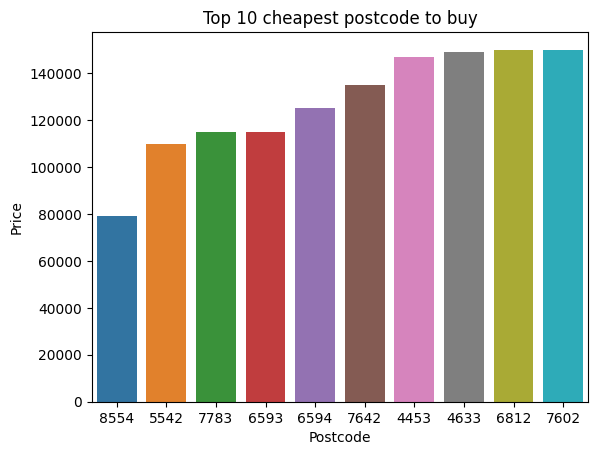

In [56]:
#dict as dataframe
df = pd.DataFrame(pzb_c, columns = ['Postcode', 'Price'])
#plot the bar chart by order of price with sns in decreasing price
sns.barplot(x="Postcode", y="Price", data=df, order = df.sort_values("Price").Postcode).set(title='Top 10 cheapest postcode to buy', xlabel='Postcode', ylabel='Price')

[Text(0.5, 1.0, 'Top 10 cheapest postcode to rent'),
 Text(0.5, 0, 'Postcode'),
 Text(0, 0.5, 'Price')]

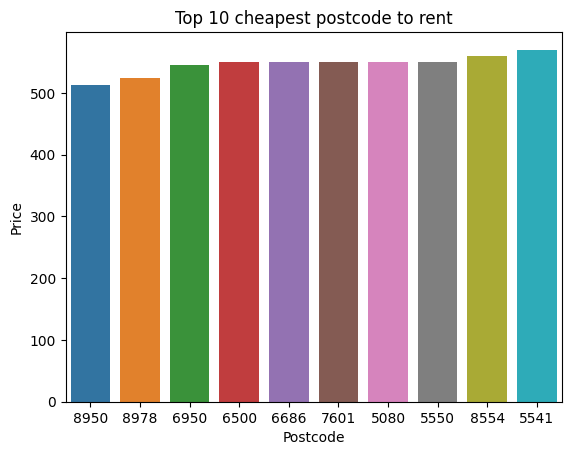

In [57]:
#dict as dataframe
df = pd.DataFrame(pzr_c, columns = ['Postcode', 'Price'])
#plot the bar chart by order of price with sns in decreasing price
sns.barplot(x="Postcode", y="Price", data=df, order = df.sort_values("Price").Postcode).set(title='Top 10 cheapest postcode to rent', xlabel='Postcode', ylabel='Price')

In [58]:

#price vs living area
#plt.figure(figsize=(10, 10))
#plt.title("Price vs living area")
#plt.ylabel("Price")
#plt.xlabel("Living area")

#drop nan for living area

#data_a_to_buy = data_a_to_buy[data_a_to_buy["Living Area"] != None]

#emove living arre > 1500


#data_a_to_buy = data_a_to_buy[data_a_to_buy["Living Area"] < 1500]

#plt.scatter(data_a_to_buy["Living Area"],data_a_to_buy["Price"])

#plt.show()

[Text(0.5, 1.0, 'Median price by number of rooms'),
 Text(0.5, 0, 'Number of rooms'),
 Text(0, 0.5, 'Price')]

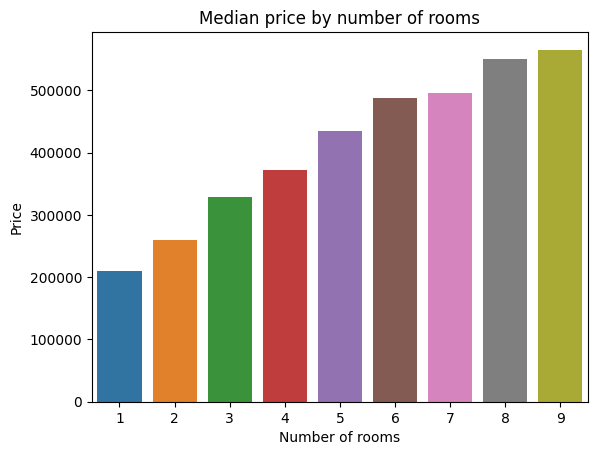

In [60]:

#mean price by number of rooms
data_a_to_buy = data_a_to_buy[data_a_to_buy["Number of rooms"] != None]
data_a_to_buy = data_a_to_buy[data_a_to_buy["Number of rooms"] < 15]

medians = []
x = []
#separate the data by number of rooms with a for loop
for i in range(1, 10):

    #get the data for the number of rooms
    data_a_to_buy_i = data_a_to_buy[data_a_to_buy["Number of rooms"] == i]

    #get the median price
    median_price = data_a_to_buy_i["Price"].median()


    #append the median price to the list
    medians.append(median_price)
    x.append(i)


#plot the median price by number of rooms with sns
sns.barplot(x=x, y=medians).set(title='Median price by number of rooms', xlabel='Number of rooms', ylabel='Price')



    


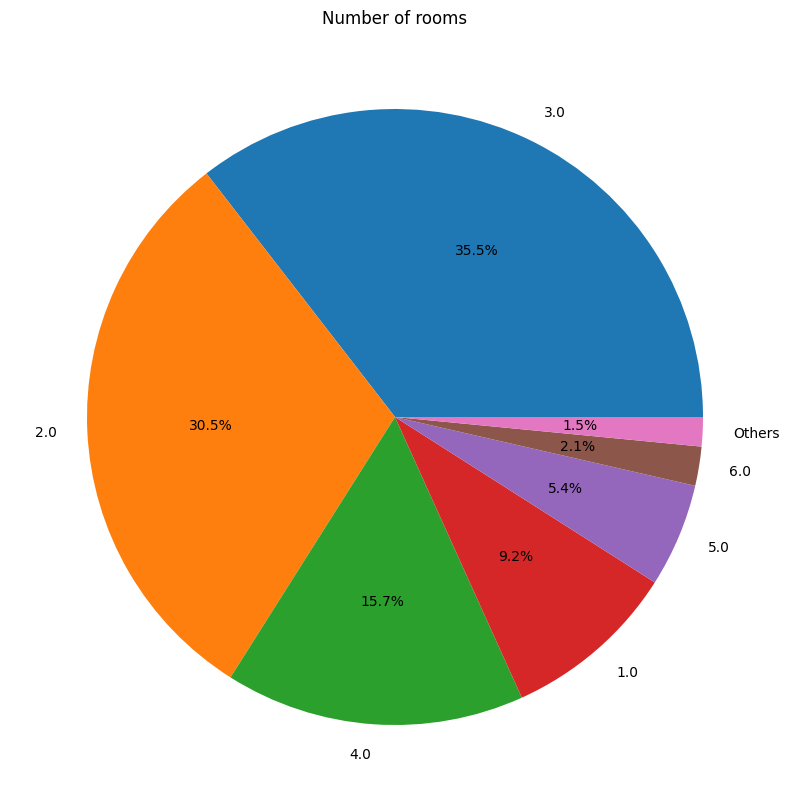

In [73]:
#pie chart of the number of rooms 
data_a_to_buy = data_a_to_buy[data_a_to_buy["Number of rooms"] != None]
data_a_to_buy = data_a_to_buy[data_a_to_buy["Number of rooms"] < 15]

#count the number of rooms
rooms = data_a_to_buy["Number of rooms"].value_counts()

#plot the pie chart
#put value <5% together
#sums all values < 5
sums = rooms[rooms < 500].sum()
#remove values < 5
rooms = rooms[rooms >= 500]
#add the sum of the values < 5
rooms.loc["Others"] = sums

plt.figure(figsize=(10, 10))
plt.title("Number of rooms")
plt.pie(rooms, labels=rooms.index, autopct='%1.1f%%')
plt.show()